#### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")

#### Loading Dataset

In [23]:
data=pd.read_csv('bmi.csv')

#### EDA

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [25]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


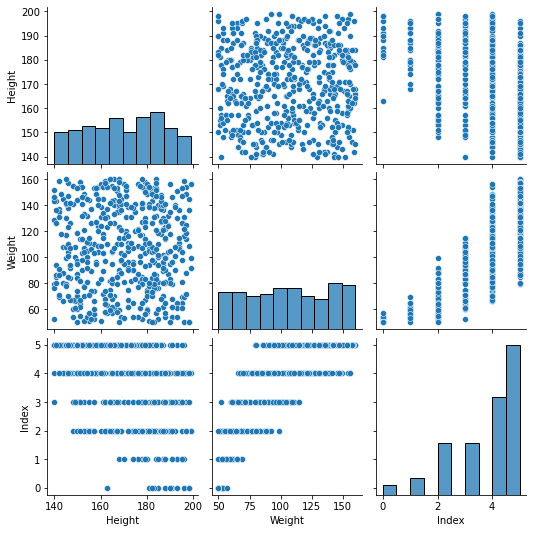

In [26]:
sns.pairplot(data)

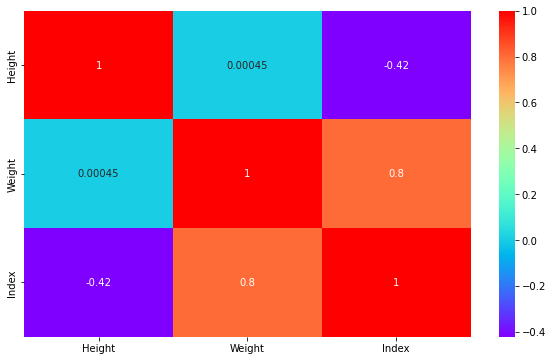

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')
plt.show()

In [28]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [31]:
#Applying Label encoding for Gender column 
le=LabelEncoder()
data['Gender']= le.fit_transform(data['Gender'])

In [32]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


#### Splitting the Data

In [33]:
X=data.drop('Index',axis=1)
y=data['Index']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [37]:
X.head()

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61


#### LonearRegression Model Building

In [38]:
Lr=LinearRegression()

In [39]:
Lr.fit(X_train,y_train)

LinearRegression()

In [40]:
lr_pred=Lr.predict(X_test)

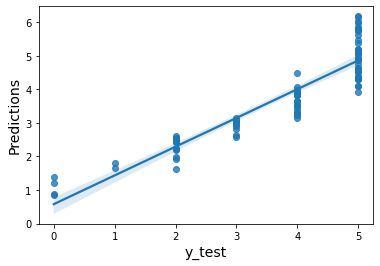

In [42]:
#Regplot between y_test and predictions
sns.regplot(y_test,lr_pred)
plt.xlabel('y_test',fontsize=14)
plt.ylabel('Predictions',fontsize=14)
plt.show()

In [43]:
MAE = metrics.mean_absolute_error(y_test, lr_pred)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, lr_pred)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, lr_pred))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,lr_pred)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 0.4536739668267043
MSE for test set is 0.31351604002983186
RMSE for test set is 0.5599250307227137
R2 score for test set is 0.8388837864074044
Adjusted R2 score for test set is 0.8338489047326357


#### DecisionTreeRegressor

In [46]:
dt=DecisionTreeRegressor()

In [47]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [48]:
dt_pred=dt.predict(X_test)

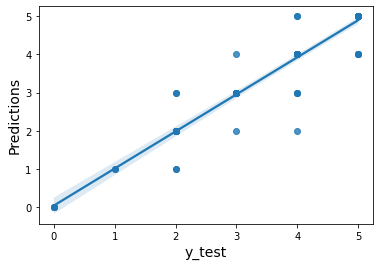

In [49]:
#Regplot between y_test and predictions
sns.regplot(y_test,dt_pred)
plt.xlabel('y_test',fontsize=14)
plt.ylabel('Predictions',fontsize=14)
plt.show()

In [50]:
MAE = metrics.mean_absolute_error(y_test, dt_pred)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, dt_pred)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, dt_pred))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,dt_pred)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 0.17
MSE for test set is 0.19
RMSE for test set is 0.43588989435406733
R2 score for test set is 0.9023588056940233
Adjusted R2 score for test set is 0.8993075183719614


#### RandomForest Regressor

In [51]:
rf=RandomForestRegressor()

In [52]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
rf_pred=rf.predict(X_test)

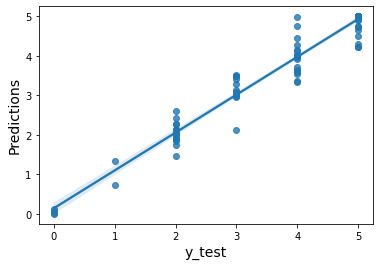

In [54]:
#Regplot between y_test and predictions
sns.regplot(y_test,rf_pred)
plt.xlabel('y_test',fontsize=14)
plt.ylabel('Predictions',fontsize=14)
plt.show()

In [55]:
MAE = metrics.mean_absolute_error(y_test, rf_pred)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, rf_pred)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,rf_pred)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 0.1728
MSE for test set is 0.08751200000000002
RMSE for test set is 0.29582427216170076
R2 score for test set is 0.9550274937047124
Adjusted R2 score for test set is 0.9536221028829847


Among the three models, RandomForestRegression gave best results

Pickling the RandomForestRegression Model

In [57]:
import pickle
# open a file, where you ant to store the data
file = open('Predicting the BMI.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)